# Predicting Heart Disease

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
sns.set(style="whitegrid", color_codes=True)

In [159]:
df = pd.read_csv('Heart.csv')

In [160]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [162]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [163]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [164]:
#re-map column values
df.replace({'sex': {0:'female', 1: 'male'},
           'cp': {0: 'typical_angina', 1: 'atypical_angina', 2: 'non-anginal_pain', 3: 'asymptomatic'}, 
           'fbs': {0:'no', 1: 'yes'},
           'restecg':{0:'normal', 1:'ST-T_wave_abnormality', 2: 'left_ventricular_hypertrophy'},
           'exang': {0: 'no', 1: 'yes'},
           'slope': {0: 'upsloping', 1: 'flat', 2:'downsloping'},
           'thal': {0: 'unknown', 1: 'normal', 2: 'fixed_defect', 3: 'reversable_defect'}}, inplace=True) 

In [165]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,yes,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal_pain,130,250,no,ST-T_wave_abnormality,187,no,3.5,upsloping,0,fixed_defect,1
2,41,female,atypical_angina,130,204,no,normal,172,no,1.4,downsloping,0,fixed_defect,1
3,56,male,atypical_angina,120,236,no,ST-T_wave_abnormality,178,no,0.8,downsloping,0,fixed_defect,1
4,57,female,typical_angina,120,354,no,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,fixed_defect,1


# Categorical EDA

In [166]:
categorical_df = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','target']]

In [167]:
categorical_df.head()

,sex,cp,fbs,restecg,exang,slope,thal,target
0,male,asymptomatic,yes,normal,no,upsloping,normal,1
1,male,non-anginal_pain,no,ST-T_wave_abnormality,no,upsloping,fixed_defect,1
2,female,atypical_angina,no,normal,no,downsloping,fixed_defect,1
3,male,atypical_angina,no,ST-T_wave_abnormality,no,downsloping,fixed_defect,1
4,female,typical_angina,no,ST-T_wave_abnormality,yes,downsloping,fixed_defect,1


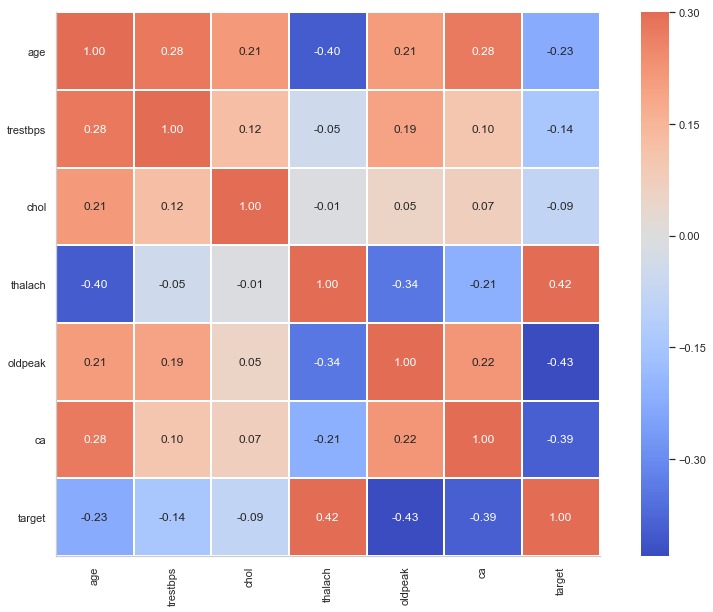

In [168]:
corr_cat = df.corr()
heatmap = sns.heatmap(corr_cat,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
heatmap.figure.set_size_inches(15,10)
    
plt.show()

In [169]:
def barplot(x_val, y_val='target',data=df):
    barplot = sns.barplot(x=x_val,y=y_val,data=data)
    return barplot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


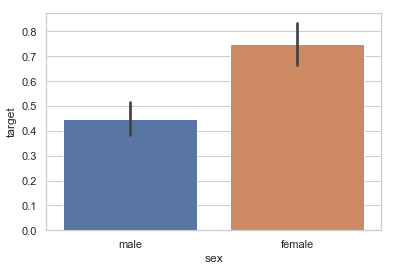

In [170]:
barplot('sex')

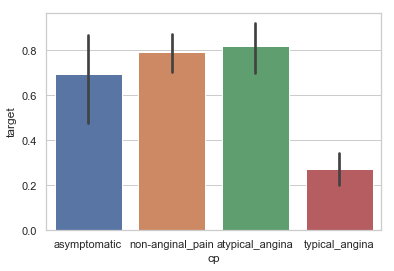

In [171]:
barplot('cp')

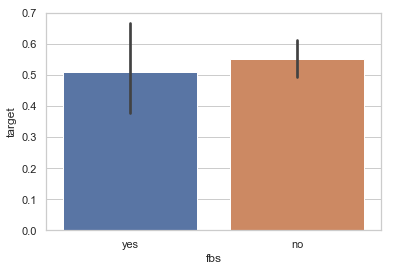

In [172]:
barplot('fbs')

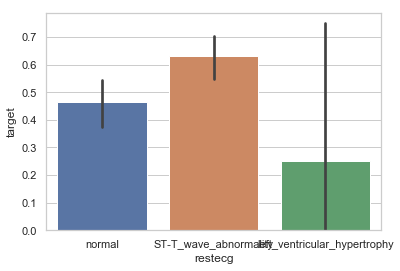

In [173]:
barplot('restecg')

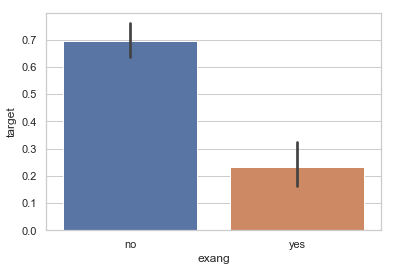

In [174]:
barplot('exang')

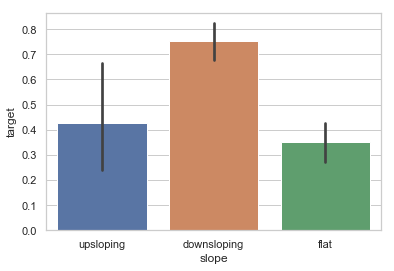

In [175]:
barplot('slope')

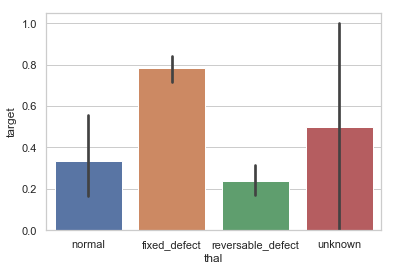

In [176]:
barplot('thal')

In [177]:
def bar_plot(feature, data):
    values_counts = data[feature].value_counts().to_frame().reset_index()
    return values_counts.plot(kind='bar')

AttributeError: 'AxesSubplot' object has no attribute 'rename'

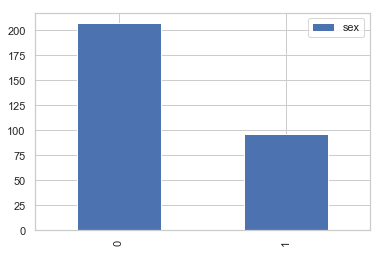

In [178]:
bar_plot_sex = bar_plot('sex', df)
bar_plot_sex.rename(columns = {'index': 'sex', 'sex': 'count'}, inplace = True)

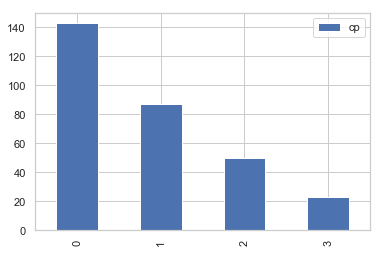

In [179]:
bar_plot('cp', df)

In [180]:
sex_values_counts = df['sex'].value_counts().to_frame().reset_index()

In [181]:
sex_values_counts.rename(columns = {'index': 'sex', 'sex': 'count'}, inplace = True)

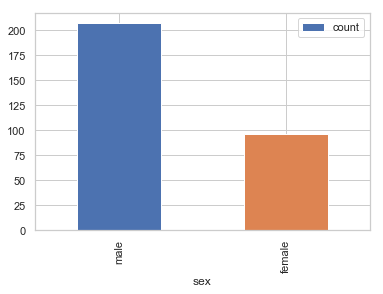

In [182]:
sex_values_counts.plot(x='sex', y='count', kind='bar')

In [183]:
sex_values_counts

,sex,count
0,male,207
1,female,96


# Continuous EDA

In [184]:
continuous_df = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']]

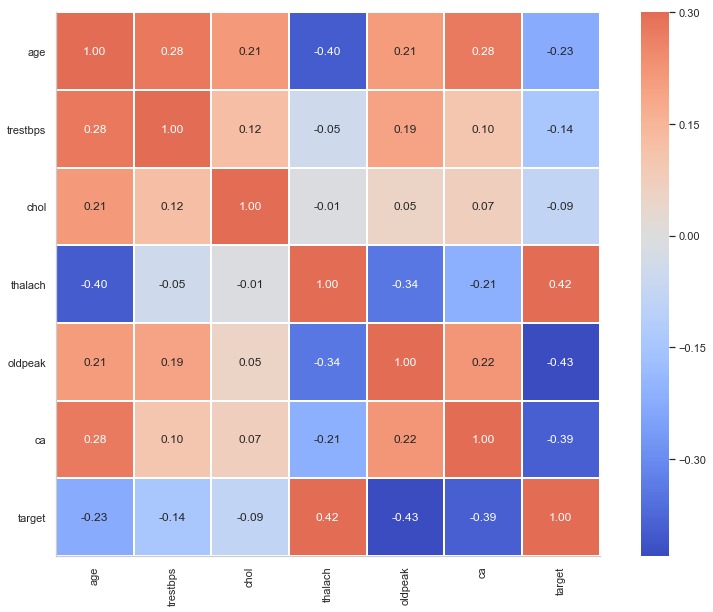

In [185]:
corr_con = continuous_df.corr()
heatmap = sns.heatmap(corr_con,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
heatmap.figure.set_size_inches(15,10)
    
plt.show()

In [186]:
df.groupby('target').mean().T

target,0,1
age,56.601449,52.496970
trestbps,134.398551,129.303030
chol,251.086957,242.230303
thalach,139.101449,158.466667
oldpeak,1.585507,0.583030
ca,1.166667,0.363636


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


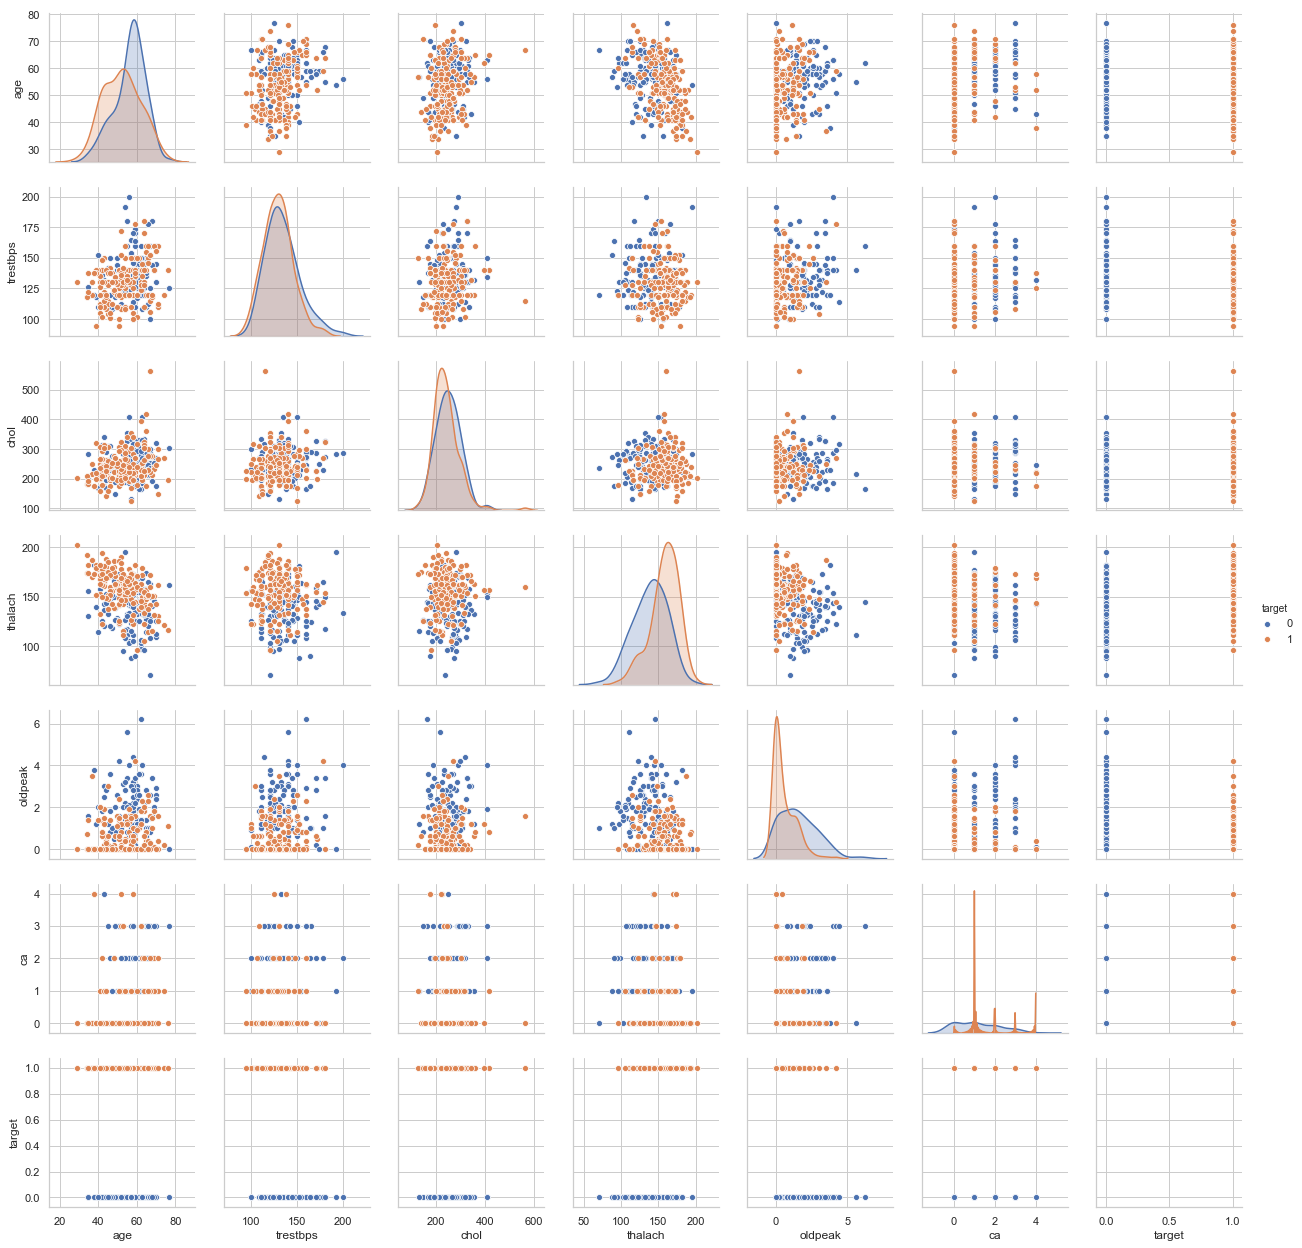

In [187]:
sns.pairplot(continuous_df, hue ='target')

In [188]:
def boxplot(x_val, y_val='target',data=df):
    boxplot = sns.boxplot(x=x_val,y=y_val,data=data, orient = 'h', saturation=1, width=.5, fliersize=5)
    return boxplot

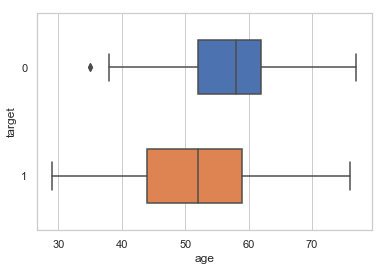

In [189]:
boxplot('age')

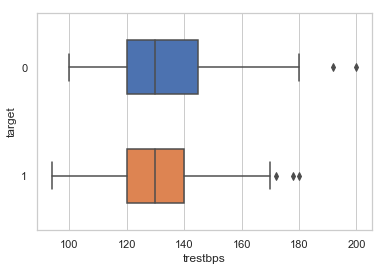

In [190]:
boxplot('trestbps')

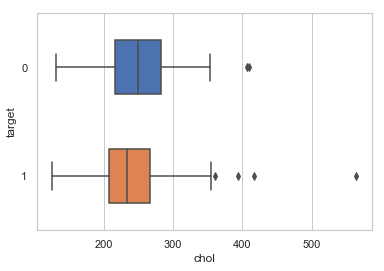

In [191]:
boxplot('chol')

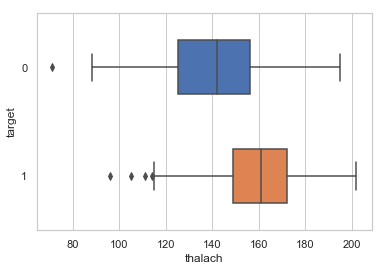

In [192]:
boxplot('thalach')

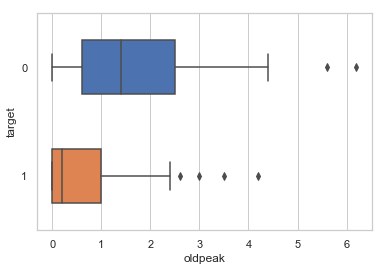

In [193]:
boxplot('oldpeak')

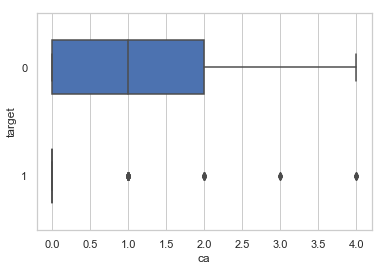

In [194]:
boxplot('ca')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c31445470>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c315bb128>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3165ce80>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c316a1f98>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c316f3080>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c316d3b38>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c31770fd0>]]


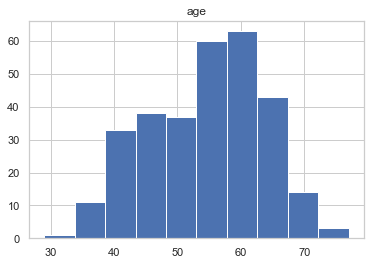

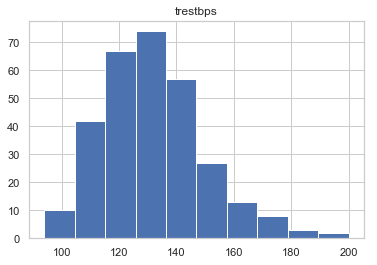

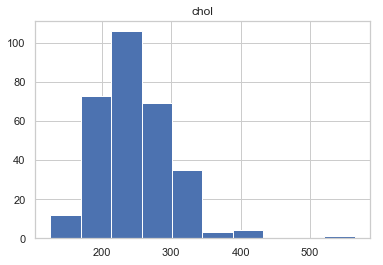

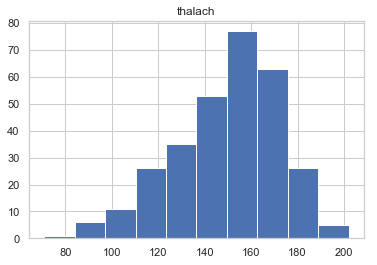

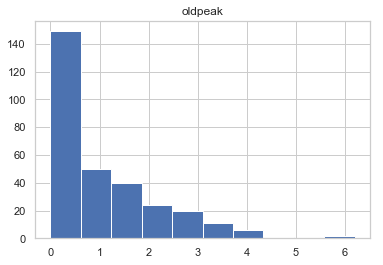

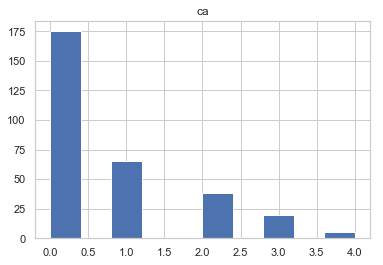

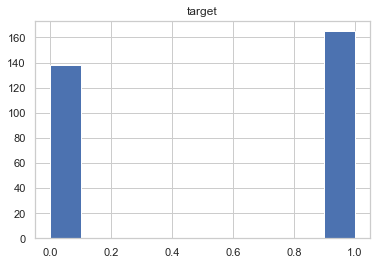

In [195]:
for feature in continuous_df:
    print(continuous_df.hist(feature))

 # EDA Insights

 # Dummy Variables

In [196]:
#add rest of dummies
dummy_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
new_dfs = []
for feature in dummy_list:
    df_dummies = pd.get_dummies(df[feature])
    new_dfs.append(df_dummies)
    df.drop(feature, axis = 1, inplace =True)
    
dummy_df = pd.concat(new_dfs, axis = 1)
final_df = pd.concat([df, dummy_df], axis =1)

In [197]:
final_df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,female,male,asymptomatic,...,normal,no,yes,downsloping,flat,upsloping,fixed_defect,normal,reversable_defect,unknown
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [218]:
final_df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'female', 'male', 'asymptomatic', 'atypical_angina', 'non-anginal_pain',
       'typical_angina', 'no', 'yes', 'ST-T_wave_abnormality',
       'left_ventricular_hypertrophy', 'normal', 'no', 'yes', 'downsloping',
       'flat', 'upsloping', 'fixed_defect', 'normal', 'reversable_defect',
       'unknown'],
      dtype='object')

In [198]:
final_df.shape

(303, 27)

In [199]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 27 columns):
age                             303 non-null int64
trestbps                        303 non-null int64
chol                            303 non-null int64
thalach                         303 non-null int64
oldpeak                         303 non-null float64
ca                              303 non-null int64
target                          303 non-null int64
female                          303 non-null uint8
male                            303 non-null uint8
asymptomatic                    303 non-null uint8
atypical_angina                 303 non-null uint8
non-anginal_pain                303 non-null uint8
typical_angina                  303 non-null uint8
no                              303 non-null uint8
yes                             303 non-null uint8
ST-T_wave_abnormality           303 non-null uint8
left_ventricular_hypertrophy    303 non-null uint8
normal                    

In [200]:
final_df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target,female,male,asymptomatic,...,normal,no,yes,downsloping,flat,upsloping,fixed_defect,normal,reversable_defect,unknown
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554,0.316832,0.683168,0.075908,...,0.485149,0.673267,0.326733,0.468647,0.462046,0.069307,0.547855,0.059406,0.386139,0.006601
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835,0.466011,0.466011,0.265288,...,0.500606,0.469794,0.469794,0.499842,0.499382,0.254395,0.498528,0.236774,0.487668,0.081110
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 # Logistic Regression

In [134]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [143]:
X = final_df.drop(['target'], axis=1)
y = final_df.target

In [144]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.332828
         Iterations: 35
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.517     
Dependent Variable:           target                     AIC:                        241.6936  
Date:                         2020-04-14 15:01           BIC:                        315.9682  
No. Observations:             303                        Log-Likelihood:             -100.85   
Df Model:                     19                         LL-Null:                    -208.82   
Df Residuals:                 283                        LLR p-value:                2.2389e-35
Converged:                    0.0000                     Scale:                      1.0000    
No. Iterations:               35.0000                                                          
-----------------------------------------------------------------------------------------------
               

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[33 11]
 [ 4 43]]


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.75      0.81        44
          1       0.80      0.91      0.85        47

avg / total       0.84      0.84      0.83        91



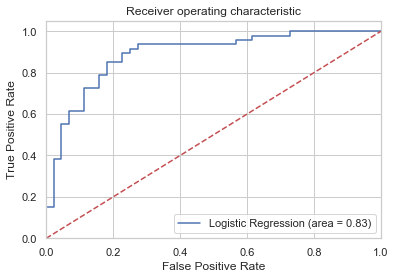

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 # Random Forest


In [201]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X= final_df.drop('target', axis =1)  # Features
y= final_df.target  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [202]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [203]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8351648351648352


In [204]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca',
       'female', 'male', 'asymptomatic', 'atypical_angina', 'non-anginal_pain',
       'typical_angina', 'no', 'yes', 'ST-T_wave_abnormality',
       'left_ventricular_hypertrophy', 'normal', 'no', 'yes', 'downsloping',
       'flat', 'upsloping', 'fixed_defect', 'normal', 'reversable_defect',
       'unknown']
target_names = ['target']
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp                        
                                            
                        
                        

ca                              0.124626
reversable_defect               0.092948
thalach                         0.089835
typical_angina                  0.086570
fixed_defect                    0.082254
oldpeak                         0.078583
trestbps                        0.075594
age                             0.070055
chol                            0.067695
no                              0.029466
yes                             0.027473
flat                            0.024968
male                            0.023565
downsloping                     0.021574
female                          0.020916
non-anginal_pain                0.017752
normal                          0.012626
ST-T_wave_abnormality           0.012185
atypical_angina                 0.011985
asymptomatic                    0.008758
no                              0.005263
upsloping                       0.004914
yes                             0.004827
normal                          0.004672
unknown         

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


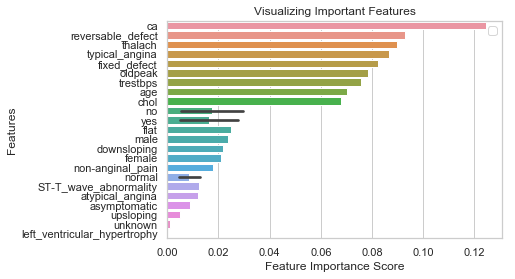

In [221]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

 # Gradient Boosting